# DNN으로 삼각함수 예측하기




* pyforest 참고 - https://hyeonchan523.github.io/python/pyforest/

In [1]:
!pip install pyforest

In [2]:
import pyforest

In [3]:
all_libs = dir(pyforest) # import 된 모든 라이브러리를 반환
# all_libs

In [4]:
active_libs = pyforest.active_imports() # import 되었지만 사용되지 않은 라이브러리 리스트 반환
laze_libs = pyforest.lazy_imports() # import되고, 사용중인 라이브러리의 리스트 반환

In [5]:
print('==================')
print('Active libs \n',len(active_libs))
print('==================')
print('Laze libs \n',len(laze_libs))
print('==================')

Active libs 
 0
Laze libs 
 79


# 데이터 생성

## cos 함수로 데이터 생성

* numpy.cos - https://numpy.org/doc/stable/reference/generated/numpy.cos.html

In [6]:
def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data)-look_back):
        dataX.append(signal_data[i:(i+look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [7]:
# 데이터셋 생성하기
cos_x = np.linspace(-20*np.pi, 20*np.pi, 1600) # -20pi ~ 20pi 범위의 X값 생성
cos_y = np.cos(cos_x) # np.sin 함수로 Y값 생성

signal_data = cos_y.reshape(-1, 1)
signal_data[:5]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([[1.        ],
       [0.99691348],
       [0.98767297],
       [0.97233551],
       [0.95099578]])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

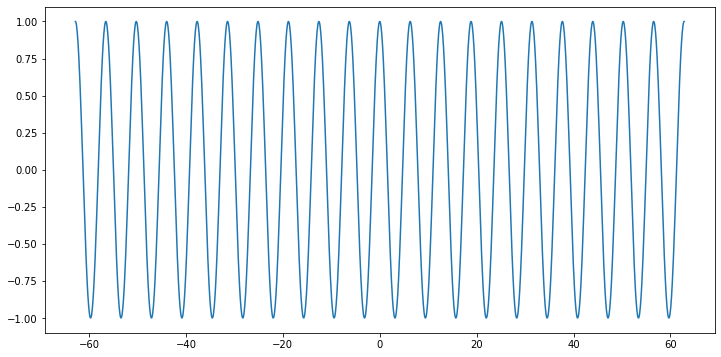

In [8]:
plt.figure(figsize=(12,6))
plt.plot(cos_x, cos_y)
plt.show()

In [9]:
# 데이터 분리
train = signal_data[0:800]
val = signal_data[800:1200]
test = signal_data[1200:]

In [10]:
# 데이터셋 생성
look_back = 10 # 지난 10개의 값으로 11번째 값 예측

x_train, y_train = create_dataset(train, look_back)
x_val, y_val = create_dataset(val, look_back)
x_test, y_test = create_dataset(test, look_back)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
x_test, y_test

(array([[0.99826344, 0.99055756, 0.97673692, ..., 0.82018372, 0.77273773,
         0.72052159],
        [0.99055756, 0.97673692, 0.95688685, ..., 0.77273773, 0.72052159,
         0.66385765],
        [0.97673692, 0.95688685, 0.93112987, ..., 0.72052159, 0.66385765,
         0.60309568],
        ...,
        [0.5873083 , 0.64903711, 0.70675938, ..., 0.92378552, 0.95099578,
         0.97233551],
        [0.64903711, 0.70675938, 0.76011879, ..., 0.95099578, 0.97233551,
         0.98767297],
        [0.70675938, 0.76011879, 0.80878596, ..., 0.97233551, 0.98767297,
         0.99691348]]),
 array([ 6.63857646e-01,  6.03095678e-01,  5.38610774e-01,  4.70801003e-01,
         4.00084957e-01,  3.26899170e-01,  2.51695421e-01,  1.74937945e-01,
         9.71005695e-02,  1.86637882e-02, -5.98882055e-02, -1.38070507e-01,
        -2.15400493e-01, -2.91400803e-01, -3.65602283e-01, -4.37546885e-01,
        -5.06790491e-01, -5.72905658e-01, -6.35484254e-01, -6.94139979e-01,
        -7.48510748e-01, -7.9

In [12]:
print(x_train[0].shape)
x_train[0], y_train[0]

(10,)


(array([1.        , 0.99691348, 0.98767297, 0.97233551, 0.95099578,
        0.92378552, 0.89087269, 0.85246047, 0.80878596, 0.76011879]),
 0.7067593785998536)

# Model - DNN

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(32, activation="relu", input_dim=10))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='sgd')


hist = model.fit(x_train, y_train, epochs=50, batch_size=8, validation_data=(x_val, y_val), verbose=2, )

Init Plugin
Init Graph Optimizer
Init Kernel
Metal device set to: Apple M1


2021-07-28 12:00:58.123107: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-07-28 12:00:58.123487: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2021-07-28 12:00:58.415946: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-07-28 12:00:58.420693: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-07-28 12:00:58.565904: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/50
99/99 - 1s - loss: 0.1232 - val_loss: 0.0498


2021-07-28 12:00:59.218609: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/50
99/99 - 1s - loss: 0.0366 - val_loss: 0.0269
Epoch 3/50
99/99 - 1s - loss: 0.0191 - val_loss: 0.0129
Epoch 4/50
99/99 - 1s - loss: 0.0090 - val_loss: 0.0057
Epoch 5/50
99/99 - 1s - loss: 0.0039 - val_loss: 0.0025
Epoch 6/50
99/99 - 1s - loss: 0.0017 - val_loss: 0.0012
Epoch 7/50
99/99 - 1s - loss: 8.0215e-04 - val_loss: 5.6898e-04
Epoch 8/50
99/99 - 1s - loss: 4.1908e-04 - val_loss: 3.1799e-04
Epoch 9/50
99/99 - 1s - loss: 2.5672e-04 - val_loss: 2.1097e-04
Epoch 10/50
99/99 - 1s - loss: 1.8225e-04 - val_loss: 1.6124e-04
Epoch 11/50
99/99 - 1s - loss: 1.4332e-04 - val_loss: 1.3748e-04
Epoch 12/50
99/99 - 1s - loss: 1.2339e-04 - val_loss: 1.2153e-04
Epoch 13/50
99/99 - 1s - loss: 1.1116e-04 - val_loss: 1.1168e-04
Epoch 14/50
99/99 - 1s - loss: 1.0308e-04 - val_loss: 1.0302e-04
Epoch 15/50
99/99 - 1s - loss: 9.5459e-05 - val_loss: 9.7367e-05
Epoch 16/50
99/99 - 1s - loss: 9.0334e-05 - val_loss: 9.4805e-05
Epoch 17/50
99/99 - 1s - loss: 8.6093e-05 - val_loss: 8.7066e-05
Epoch 18

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

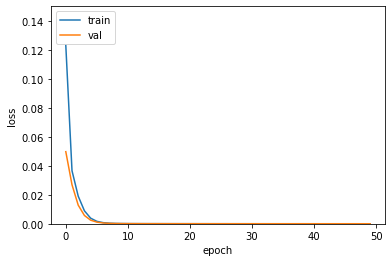

In [19]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [20]:
print(x_test)
print(y_test)

[[0.99826344 0.99055756 0.97673692 ... 0.82018372 0.77273773 0.72052159]
 [0.99055756 0.97673692 0.95688685 ... 0.77273773 0.72052159 0.66385765]
 [0.97673692 0.95688685 0.93112987 ... 0.72052159 0.66385765 0.60309568]
 ...
 [0.5873083  0.64903711 0.70675938 ... 0.92378552 0.95099578 0.97233551]
 [0.64903711 0.70675938 0.76011879 ... 0.95099578 0.97233551 0.98767297]
 [0.70675938 0.76011879 0.80878596 ... 0.97233551 0.98767297 0.99691348]]
[ 6.63857646e-01  6.03095678e-01  5.38610774e-01  4.70801003e-01
  4.00084957e-01  3.26899170e-01  2.51695421e-01  1.74937945e-01
  9.71005695e-02  1.86637882e-02 -5.98882055e-02 -1.38070507e-01
 -2.15400493e-01 -2.91400803e-01 -3.65602283e-01 -4.37546885e-01
 -5.06790491e-01 -5.72905658e-01 -6.35484254e-01 -6.94139979e-01
 -7.48510748e-01 -7.98260929e-01 -8.43083411e-01 -8.82701503e-01
 -9.16870642e-01 -9.45379899e-01 -9.68053286e-01 -9.84750838e-01
 -9.95369483e-01 -9.99843668e-01 -9.98145777e-01 -9.90286289e-01
 -9.76313722e-01 -9.56314329e-01 -9.

In [21]:
trainScore = model.evaluate(x_train, y_train, verbose=0)
print('Train Score: ', round(trainScore, 6))
valScore = model.evaluate(x_val, y_val, verbose=0)
print('Validataion Score: ', round(valScore, 6))
testScore = model.evaluate(x_test, y_test, verbose=0)
print('Test Score: ', round(testScore, 6))

Train Score:  3.7e-05
Validataion Score:  4e-05
Test Score:  3.9e-05


In [17]:
x_test.shape

(390, 10)

<IPython.core.display.Javascript object>

2021-07-28 12:01:28.459253: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

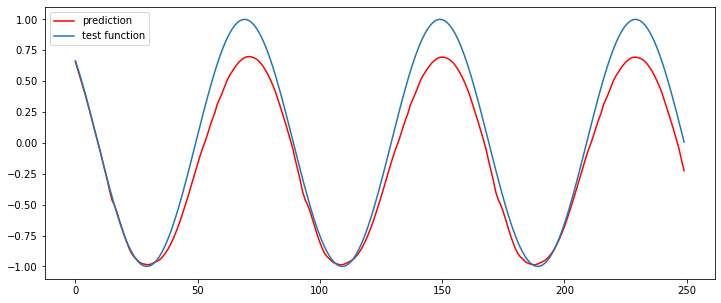

In [18]:
look_ahead = 250
xhat = x_test[0, None]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(xhat, batch_size=32)
    predictions[i] = prediction
    xhat = np.hstack([xhat[:,1:], prediction])

plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead), predictions,'r', label="prediction")
plt.plot(np.arange(look_ahead), y_test[:look_ahead], label="test function")
plt.legend()
plt.show()